#PyTorch Workflow

1. Data (preparation and load)
2. Build Model
3. Fitting the model to data (Training)
4. Making predictions and evaluating model (Inference)
5. Saving and loading model
6. Combining all together

In [29]:
import torch
from torch import nn #nn contains all of PyTorch building blocks for neural networks
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.4.0+cu121'

##1.0 Data (Preparing and Loading)

###Data can be any format in machine learning

* Excel spreadsheet
* Image
* Videos (Youtube)
* Audio (Songs or Podcasts)
* DNA
* Text

###Machine Learning can be divided into two parts:
1. Get data into numerical representation
2. Build a model to learn patterns in that numerical representation

#### Use Linear Regression with *known* **parameter** to create *known* data



In [30]:

#Create *known* parameter
# y = bX + a
weight = 0.7 # == b
bias = 0.3 # == a

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1) # Input
y = weight * X + bias # Output

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [31]:
len(X), len(y)

(50, 50)

###1.1 Splitting data into training and testing sets (One of the most important concepts in machine learning in general)

In [32]:
#Create train split and test split
train_split = int(0.8 * len(X)) # 80% of data
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)
#in this example, we are using simple data set, for further information, search for "scikit-learn train test split"

(40, 40, 10, 10)

In [33]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [34]:
#How can we better visualize our data?
def plot_predictions(train_data = X_train,
                     train_lables = y_train,
                     test_data = X_test,
                     test_lables = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data, train_lables, c="b", s=4, label = "Training data")
  #c = color, s = size
  #Plot test data in green
  plt.scatter(test_data, test_lables, c="g", s=4, label = "Testing data")

  #Are there predictions?
  if predictions is not None:
    #Plot the prediction if exist
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

    #Show the legend
  plt.legend(prop={"size":14})
#

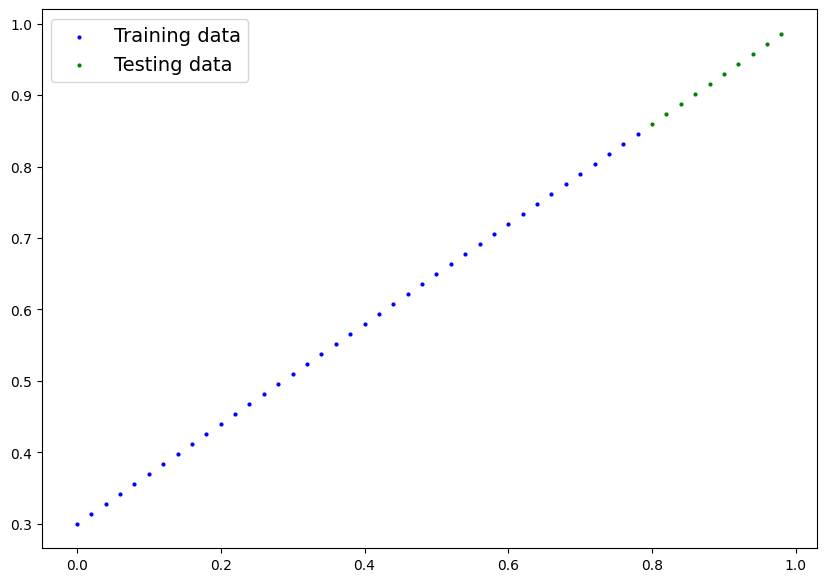

In [35]:
plot_predictions()

##2.0 Build a model
### Object-Oriented Programming based

### What the model does:
* Start with random parameters (weight and bias)
* Look at training data and adjust the random parameters to better represent the ideal parameters(weight and bias values that we used to create the data)

###How does it work?
### Through two main algorithms:

1. Gradient descent
2. Backpropagation

#####Graident descent is related to why we need `requries_grad = True`

In [36]:
from torch import nn
#Create a linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
# 1. model randomly set parameters (weight and bias)
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad = True, #requires_grad has default value of True, no need to assign
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad = True,
                                          dtype = torch.float))

# 2. model go through forward function to adjust the parameter to better represent the data
    #Forward method to define the computationa in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # 'x' is the input data
    return self.weight * x + self.bias # linear regression formula


In [37]:
from torch import nn
#Create a linear regression model
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    #initialize model parameters ** these could be different layers from torch.nn, single parameter, hard-coded values or functions
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad = True, # this means that PyTorch will track the gradient of this specific parameter for use with torch.autograd and gradient descent
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad = True,
                                          dtype = torch.float))

    # forward() defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias


### PyTorch model building essentials
* torch.nn - contains all of the building for computational graphs (another word for neural networks)
* torch.nn.Parameter -  what parameters should our model try and learn, often a PyTorch layer from torch.nn will set this for us
* torch.nn.Module -  The base class of all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - contains algorithms that optimize parameters in the model
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happen in the forward computation

##### **Additional**

* torch.utils.data.Dataset - represents a map between key(lable) and sample(features) pairs of your data. Such as images and their associated labels.
* torch.util.data.DataLoader - creates a Python iterable over a torch Dataset (allows you to iterate over your data)

##### *please refer to PyTorch Cheat Sheet for further information

#### For 1. Data preparation following modules are used:
* `torchvision.transforms`
* `torch.utils.data.Dataset`
* `torch.utils.data.DataLoader`

#### For 2. Build a (pretrained) model
* `torch.nn`
* `torch.nn,Module`
* `torchvision.models` -> for pretrained model

##### For 2.1 Pick a loss function & optimizer
* `torch.optim`

#### For 4. Evaluate the model
* `torchmetrics`

#### For 5. Improve through experimentation
* `torch.util.tensorboard`

##### *for further informaiton, please refer to Pytorch Cheat Sheet


### 2.1 Chekcing the content of PyTorch model

We can check our model parameters or what;s inside our model using `.parameters()`.


In [38]:
# Create a random seed
torch.manual_seed(1234) #think about reason for using this manual seed

#Create an instance of the model(this i s a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
model_0.parameters()

<generator object Module.parameters at 0x7d8132fd90e0>

In [39]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.0461], requires_grad=True),
 Parameter containing:
 tensor([0.4024], requires_grad=True)]

In [40]:
# List Named parameters
model_0.state_dict() #provide named dictionary

OrderedDict([('weight', tensor([0.0461])), ('bias', tensor([0.4024]))])

In [41]:
# the purpose of the model is to make the above tensor values as close as the knwon parameters as shown below
weight, bias

(0.7, 0.3)

In [42]:
### Making prediciton using `torch.inference_mode()`

To check our model's predictive power, lets see how well it predicts `y_test`, based on `X_test`.

when we pass data through our model. it's going to run it through the `forward()` method.

SyntaxError: unterminated string literal (detected at line 3) (<ipython-input-42-6dc507675255>, line 3)

In [43]:
# Make predictions with model
with torch.inference_mode(): #reason for using inference mode : no grad_function -> it stops gradient tracking , it saves memory and runtime
  y_pred = model_0(X_test)

#Similarly, you can use torch.no_grad()
#with torch.no_grad():
#  y_preds = model_0(X_test)

#But inference mode is preferred
y_pred
# keep in mind the indentation error(Notimplemented error) occurs in forward method

tensor([[0.4393],
        [0.4402],
        [0.4412],
        [0.4421],
        [0.4430],
        [0.4439],
        [0.4448],
        [0.4458],
        [0.4467],
        [0.4476]])

In [44]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

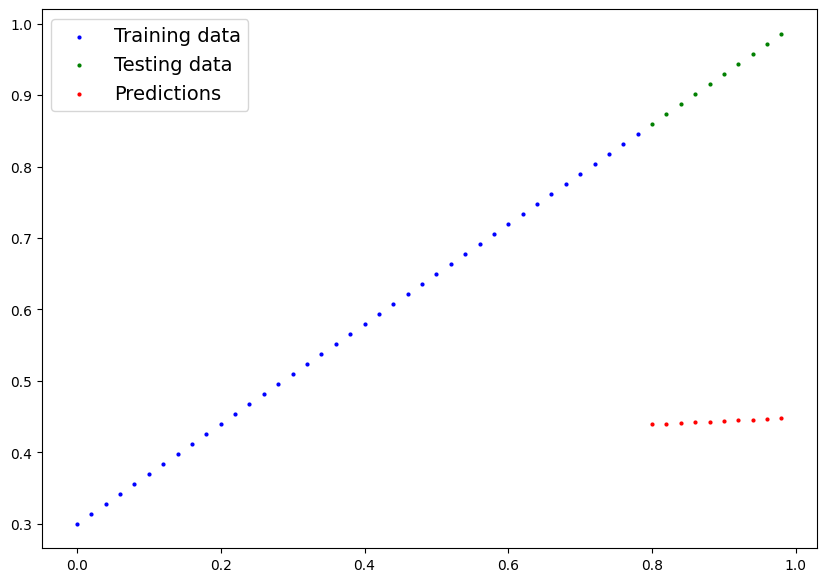

In [45]:
#check y_pred in the graph
plot_predictions(predictions=y_pred)

## 3.0 Training a model with PyTorch (Intuition Building)

The whole idea of training is for a model to move from some *unknown* parameters to some *knwon* parameters.

Or in other words from poor representation of the data to a better representation.

One way to measure how poor or how incorret your models predicitions are **Loss function**.

* Note: Loss function may also be clled cost functions or criterion.

Things we need to train:

* **Loss function:** A function to measure how incorrect you model's predictions are to the ideal output

* **Optimizer:** takes into account the loss of a model and adhusts the model's parameters (e.g. weight, bias)

And especially for PyTorch, we need:
* A training loop
* A testing loop

### 3.1 Setting up a Loss function and Optimizer

